In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
Methodsresults=pd.read_csv('MethodsResults_CLR200kb.txt', sep="\t", header=0)

In [ ]:
Matriz_pop_1=pd.read_csv('Matriz_pop_1%_CLR200kb.txt', sep="\t", header=0)

In [85]:
Matriz_pop_1=Matriz_pop_1.set_index("Reference Population")

In [22]:
Methodsresults.head(8)

,chr,2methods,3methods,4methods,total,2methods%,3methods%,4methods%,regions,1%,0.50%,0.01%
0,1,13,0,0,13,100.000000,0.000000,0,6,22,4,0
1,2,30,1,0,31,96.774194,3.225806,0,6,28,21,12
2,3,6,5,0,11,54.545455,45.454545,0,7,10,17,0
3,4,11,0,0,11,100.000000,0.000000,0,4,18,4,0
4,5,14,0,0,14,100.000000,0.000000,0,5,16,12,0
5,6,39,0,0,39,100.000000,0.000000,0,3,54,12,0
6,7,7,0,0,7,100.000000,0.000000,0,5,10,4,0
7,8,4,1,0,5,80.000000,20.000000,0,4,9,2,0


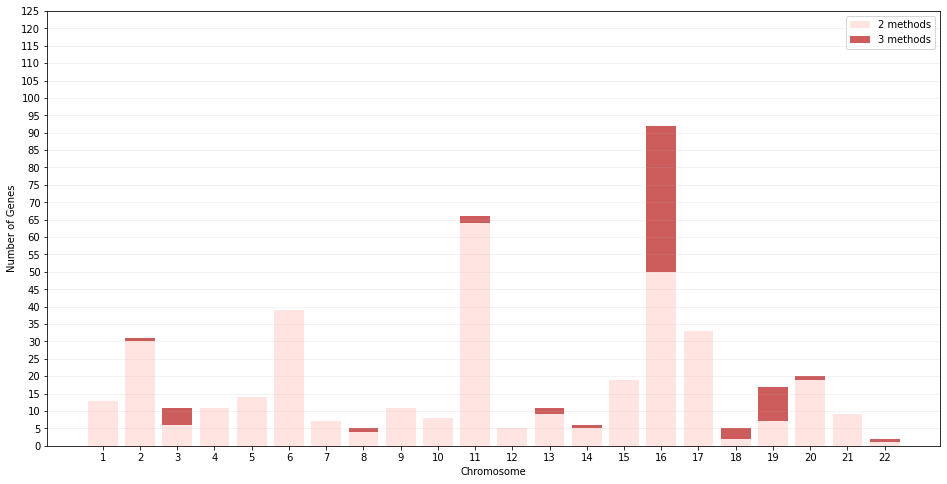

In [23]:
TwoMethods=Methodsresults["2methods"].astype(float)
TreeMethods=Methodsresults["3methods"].astype(float)
#FourMethods=Methodsresults["4methods"].astype(float)
ind=Methodsresults["chr"] # the x locations for the groups

fig, ax = plt.subplots(1, figsize=(16, 8))

ax.bar(ind, TwoMethods, color='mistyrose')
ax.bar(ind, TreeMethods, bottom=np.array(TwoMethods), color='indianred')
#ax.bar(ind, FourMethods, bottom=np.array(TwoMethods)+np.array(TreeMethods), color='red')

ax.set_ylabel('Number of Genes')
ax.set_xlabel('Chromosome')
ax.set_xticks(Methodsresults["chr"])
ax.set_yticks(np.arange(0, 130, 5))
ax.legend(labels=['2 methods', '3 methods'])
plt.grid(True, which='major', axis='y', alpha=0.2)

plt.show() 
fig.savefig('GenesDistributionGraph_CLR200kb.png')

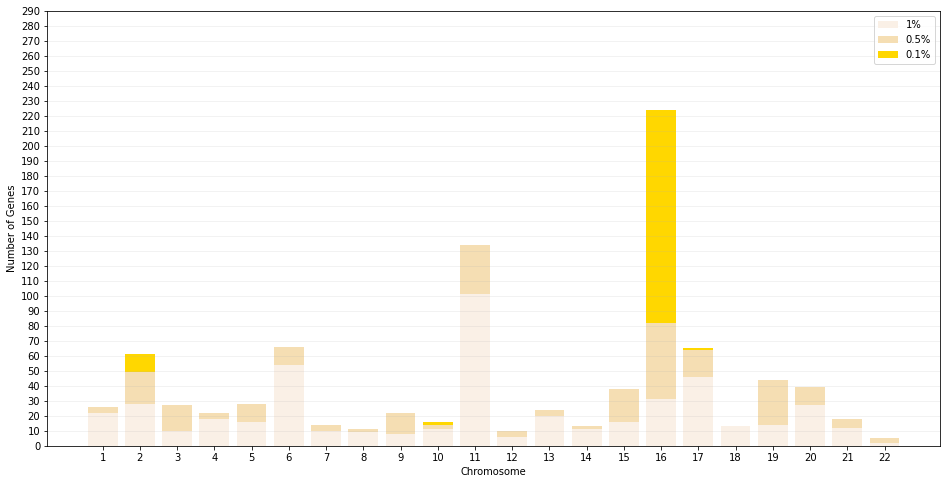

In [24]:
umpercent=Methodsresults["1%"].astype(float)
zerofivepercent=Methodsresults["0.50%"].astype(float)
zerooneMethods=Methodsresults["0.01%"].astype(float)
ind=Methodsresults["chr"] # the x locations for the groups

fig, ax = plt.subplots(1, figsize=(16, 8))

ax.bar(ind, umpercent, color='linen')
ax.bar(ind, zerofivepercent,bottom=np.array(umpercent), color='wheat')
ax.bar(ind, zerooneMethods, bottom=np.array(umpercent)+np.array(zerofivepercent), color='gold')

ax.set_ylabel('Number of Genes')
ax.set_xlabel('Chromosome')
ax.set_xticks(Methodsresults["chr"])
ax.set_yticks(np.arange(0, 300, 10))
ax.legend(labels=['1%', '0.5%', '0.1%'])
plt.grid(True, which='major', axis='y', alpha=0.2)

plt.show() 
fig.savefig('TotalResultsDistributionGraph_CLR200kb.png')

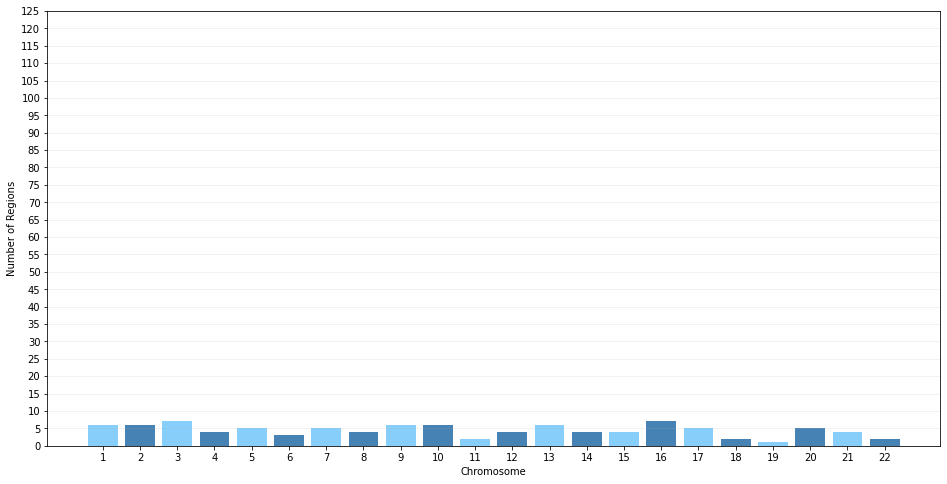

In [25]:
regions=Methodsresults["regions"].astype(float)

ind=Methodsresults["chr"] # the x locations for the groups

fig, ax = plt.subplots(1, figsize=(16, 8))

ax.bar(ind, regions, color=['lightskyblue', 'steelblue'])

ax.set_ylabel('Number of Regions')
ax.set_xlabel('Chromosome')
ax.set_xticks(Methodsresults["chr"])
ax.set_yticks(np.arange(0, 130, 5))
plt.grid(True, which='major', axis='y', alpha=0.2)

plt.show() 
fig.savefig('RegionsDistributionGraph_CLR200kb.png')

In [16]:
bimFile=pd.read_csv('Indians_1KGP_SGDP_QC_Autossomic_maf0.05_Unrelated_IndiaGroup.bim', sep="\t", header=None)
RegionsResult=pd.read_csv('RegionsByChr.txt', sep="\t", header=0)

In [17]:
RegionsResult

,Number,chr,Start,End,genes
0,1,2,132390859,132390893,NaN
1,2,20,39045514,39045586,NaN


In [18]:
for a in range(len(RegionsResult)):
    Count = 0
    for i in range(len(bimFile)):
        if bimFile[0][i] == RegionsResult["chr"][a]:
            if bimFile[3][i] > RegionsResult["Start"][a]:
                if bimFile[3][i] < RegionsResult["End"][a]:
                    Count = Count + 1
                    #print(bimFile[1][i],bimFile[3][i])
    print(Count)
    
            

0
0


In [19]:
bimFile

,0,1,2,3,4,5
0,1,rs4951929,0,757734,C,T
1,1,rs4040617,0,779322,G,A
2,1,rs77016203,0,782528,C,T
3,1,rs6681049,0,800007,T,C
4,1,rs11240779,0,808631,A,G
...,...,...,...,...,...,...
282856,22,rs12628091,0,51155733,C,T
282857,22,rs8137951,0,51165664,A,G
282858,22,rs5770824,0,51172460,C,T
282859,22,rs3810648,0,51175626,G,A


In [ ]:
CLRFile=pd.read_csv('CLR/CLR_JustIndia_grid10000.txt', sep="\t", header=0)
CLRFile200kb=pd.read_csv('CLR/CLR_Tribe_200kb.txt', sep="\t", header=0)

In [8]:
File_SNP_CLR=open("CLR/SNPs_CLR.txt", "w")

for a in range(len(CLRFile)):
    Count = 0 
    for i in range(len(bimFile)):
        if bimFile[0][i] == CLRFile["10"][a]:
            if bimFile[3][i] > CLRFile["Position"][a]:
                if bimFile[3][i] < CLRFile["Position"][a+1]:
                    Count = Count + 1
    print(Count)
    File_SNP_CLR.write(f"{CLRFile['Position'][a]}\t{Count}\n")
            

2
2
1
0
0
1
0
0
0
2
0
1
1
0
1
0
0
1
0
0
1
1
0
1
0
0
0
2
0
3
0
0
3
1
1
0
2
3
0
1
0
1
1
0
1
1
5
3
3
1
3
2
5
2
1
1
2
0
0
0
0
0
0
2
0
1
2
0
1
3
3
0
1
1
0
1
1
3
0
4
0
1
1
1
1
0
0
0
3
5
2
1
2
4
3
2
1
3
6
1
3
3
5
4
2
2
0
3
4
3
6
3
8
3
4
4
2
2
3
3
6
0
2
1
1
5
4
1
3
4
2
3
1
1
1
3
4
2
5
1
1
1
1
3
1
6
2
3
4
2
2
2
4
4
3
1
1
0
2
2
1
3
3
0
5
2
1
3
2
2
1
2
1
1
2
2
0
2
4
4
2
2
3
3
2
2
4
0
2
1
2
2
5
6
2
0
3
3
1
3
1
3
2
5
3
1
1
1
0
2
4
4
1
2
1
0
3
5
3
4
1
9
7
9
10
4
1
2
1
1
3
2
2
7
3
7
4
3
2
0
4
0
2
2
2
1
1
1
2
3
1
2
3
2
0
1
2
0
1
0
2
3
1
4
5
5
2
2
2
1
2
6
3
4
5
4
4
4
3
1
1
3
4
3
3
6
2
3
2
3
1
3
1
2
0
1
2
1
2
1
1
3
4
2
2
3
3
0
4
1
3
2
3
1
0
2
1
1
6
2
1
2
5
2
3
2
2
1
1
6
2
1
4
2
4
3
4
4
1
4
1
2
0
4
3
4
3
4
3
3
1
3
1
1
1
1
2
6
0
1
1
1
2
3
1
3
6
1
4
1
3
3
0
1
1
0
0
1
4
0
2
0
2
3
3
3
4
3
1
3
1
1
0
1
1
2
2
1
1
2
6
3
3
3
5
5
2
7
2
2
5
0
4
0
2
0
1
1
0
2
2
0
0
1
1
3
2
3
1
1
1
2
5
4
1
4
4
5
4
3
1
4
2
2
2
2
2
9
4
5
6
6
5
6
7
4
3
7
2
0
4
1
3
1
3
3
2
2
3
2
2
1
4
4
1
3
2
2
4
3
2
3
3
4
5
3
1
2
5
1
2
6
5
1
3
3
0
4
0
3

4
0
1
1
0
1
1
3
0
2
1
0
1
1
1
0
2
1
1
1
2
2
3
1
7
1
1
1
1
0
3
3
0
1
1
1
2
1
0
2
0
1
0
2
0
0
1
0
0
5
0
4
2
1
2
4
4
2
2
4
0
2
0
3
2
0
0
2
0
2
0
2
1
0
0
1
1
0
1
2
2
2
3
1
0
4
1
0
2
1
2
3
2
0
3
0
2
2
1
2
6
4
2
0
1
1
1
1
3
4
2
1
2
1
1
3
1
0
0
0
3
1
1
2
0
0
0
0
0
0
1
0
1
1
1
0
0
0
1
1
0
1
2
0
0
2
1
1
1
2
1
2
0
1
2
1
0
0
2
1
2
2
1
0
0
0
2
1
0
0
2
0
1
0
1
0
2
0
0
1
0
0
0
1
2
1
1
1
0
0
0
0
0
0
1
0
0
0
1
0
1
1
1
1
1
0
2
0
1
1
3
0
0
2
2
0
1
0
2
2
0
1
3
1
1
0
0
0
0
1
1
2
2
0
1
1
1
1
1
0
2
2
0
0
1
1
2
1
0
0
1
1
0
0
1
1
0
2
1
0
1
1
1
0
0
0
1
2
0
1
1
0
0
0
1
2
1
2
0
2
0
1
2
3
2
2
1
2
1
2
0
0
2
1
2
1
0
1
4
0
1
1
1
1
0
1
0
1
3
0
2
0
3
1
0
1
3
3
3
1
0
3
1
1
1
1
0
0
1
2
0
0
0
0
2
1
1
0
1
1
2
2
2
0
3
2
0
1
0
3
0
1
0
1
3
1
0
0
4
0
1
0
0
1
0
0
0
2
2
3
2
2
0
1
4
1
0
0
1
1
3
2
0
3
3
1
3
0
0
0
0
1
0
0
1
1
2
0
0
0
1
0
0
1
1
1
1
2
2
2
1
3
0
1
2
2
0
0
1
0
0
2
0
1
2
0
2
0
4
1
1
2
1
1
1
2
3
3
5
0
0
3
1
2
1
4
2
0
1
0
2
1
1
1
1
3
2
1
0
2
1
2
5
4
2
2
4
0
4
3
2
0
1
3
2
1
2
0
1
1
3
0
1
3
0
2
0
3
1
0
3
2
1
1
1
2
0
0
1
1


2
2
1
1
0
0
0
2
0
2
1
0
1
1
0
2
0
1
2
2
1
0
1
0
1
1
2
2
2
0
1
1
0
0
1
1
0
1
1
0
2
3
0
0
1
1
2
2
2
0
2
0
0
0
2
0
2
0
2
0
0
1
0
3
2
0
0
0
0
0
2
1
1
1
2
0
1
1
2
1
0
3
1
0
3
4
2
2
2
7
1
2
1
2
0
1
1
0
3
0
0
1
2
2
2
3
2
1
1
3
3
1
3
4
1
4
4
2
3
3
6
0
0
0
0
2
1
0
1
0
0
0
1
0
1
0
0
1
2
4
2
1
3
0
2
3
1
1
2
0
2
1
2
1
4
0
0
3
2
1
2
2
2
1
0
0
1
0
0
2
3
0
1
1
1
1
1
1
1
0
2
0
1
1
0
2
0
0
0
2
0
1
0
0
1
0
1
0
2
0
0
0
1
1
1
4
1
1
1
1
2
0
2
1
3
2
0
2
1
0
2
3
3
1
1
1
5
5
3
2
2
2
3
0
1
1
2
1
1
5
1
2
1
0
3
0
0
1
2
2
0
3
3
0
0
2
1
0
4
2
3
3
2
2
4
2
2
3
1
3
0
1
0
3
1
1
3
5
1
1
1
2
1
1
3
2
3
4
4
3
3
2
0
1
0
1
1
0
2
2
2
3
5
2
2
2
1
1
3
0
4
2
1
2
1
1
1
1
3
1
3
8
2
2
1
1
2
2
2
2
1
1
3
0
4
2
1
3
1
1
3
1
1
0
2
0
0
2
2
1
3
2
3
4
1
5
1
3
1
0
2
1
0
0
0
0
0
1
1
0
2
2
1
2
3
1
3
3
2
2
1
5
3
1
3
2
1
3
2
3
0
1
1
1
2
4
2
0
4
3
0
1
0
2
2
0
0
0
0
1
0
0
1
1
1
0
1
1
1
2
1
0
1
1
0
0
1
0
0
1
0
1
0
1
0
0
0
0
0
1
0
0
0
1
0
0
0
0
2
0
0
0
0
0
0
0
1
2
1
0
0
0
0
0
0
1
0
1
0
0
0
1
3
0
0
1
0
2
0
2
0
0
1
1
1
0
0
1
1
1
0
0
1
2
0
1
1
1
3
2


0
2
1
0
1
0
0
0
0
0
0
0
1
2
0
0
0
0
3
0
0
0
0
0
0
0
0
0
2
1
0
0
0
0
0
0
0
1
0
0
0
0
0
1
1
0
0
1
0
1
0
0
0
1
0
0
0
1
1
0
1
1
2
2
2
1
3
1
2
1
0
1
1
1
2
3
2
6
3
0
3
2
0
1
1
2
0
3
5
2
3
4
3
2
3
0
2
0
2
2
3
2
1
0
3
2
3
1
1
0
2
0
2
1
0
2
3
0
1
1
1
1
0
0
0
1
0
2
0
1
0
0
1
0
2
2
0
1
1
0
0
0
0
1
1
0
1
0
0
1
1
2
1
1
1
1
0
2
1
0
0
1
2
0
1
0
0
0
2
0
0
2
1
0
0
4
5
1
1
3
0
3
0
2
2
1
0
0
0
0
1
2
0
0
3
2
4
1
2
3
2
2
3
3
1
3
1
2
0
1
1
2
2
3
4
3
3
3
1
1
4
1
2
0
1
0
0
0
1
0
2
0
0
2
2
1
3
1
4
5
4
4
2
6
6
4
3
1
4
1
1
0
4
2
3
2
1
1
3
2
2
4
2
3
2
1
2
1
2
5
4
1
0
1
0
2
1
3
2
0
2
0
3
1
2
1
1
3
1
1
1
2
2
2
0
0
1
0
1
4
2
3
1
3
3
2
3
3
5
3
3
3
6
3
2
2
0
1
2
3
2
2
1
4
2
1
3
1
2
1
4
4
5
3
4
4
7
4
4
2
3
2
2
1
0
0
2
1
0
0
0
1
1
0
1
1
0
2
4
3
4
1
3
2
1
1
1
2
1
1
4
2
4
3
5
3
5
4
4
4
1
3
3
3
1
1
1
1
1
1
4
1
4
4
0
2
2
1
3
3
4
3
4
3
2
3
0
0
2
0
0
0
0
2
0
1
0
2
0
0
0
0
1
0
2
2
0
2
1
3
1
0
0
1
0
6
0
3
3
0
1
2
1
0
2
2
3
3
0
1
2
1
0
4
2
1
0
1
2
2
2
1
0
1
2
1
2
1
0
0
1
1
1
0
0
0
0
2
0
0
0
2
2
2
1
0
1
0
1
2
1
1
0
0
3
3
0
1
1
0


1
2
1
1
1
1
1
0
1
1
2
1
4
2
2
3
2
3
1
1
2
1
0
2
2
4
0
3
7
3
1
2
0
1
1
1
6
1
2
1
1
0
1
2
3
3
1
0
0
3
0
0
1
1
0
2
0
1
0
1
1
0
1
3
2
1
0
1
3
2
1
1
2
4
0
1
0
0
0
2
0
3
0
0
2
3
1
3
3
4
0
2
2
0
2
1
0
1
1
0
0
0
1
3
3
3
2
2
0
0
0
0
0
0
3
1
1
0
2
4
1
2
3
1
1
3
4
1
6
2
0
2
1
1
1
4
1
2
2
0
1
2
3
3
1
0
1
0
0
2
4
0
1
2
0
1
0
0
2
0
0
0
1
1
0
1
1
1
1
3
0
1
1
0
0
1
0
0
1
0
1
0
1
0
0
1
1
1
0
1
0
0
0
0
1
0
0
2
5
1
0
0
0
1
0
0
1
1
0
1
1
0
1
3
0
0
0
1
1
1
1
2
3
0
0
1
1
0
0
1
1
1
1
0
0
1
0
0
1
2
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
1
0
2
1
0
1
1
2
0
1
1
0
0
1
1
0
0
0
1
0
0
0
0
1
1
2
0
0
1
1
0
0
1
0
0
1
0
2
1
0
2
2
2
0
2
2
0
1
0
0
2
1
2
2
0
0
0
1
0
2
1
0
1
0
1
0
1
0
0
0
1
0
0
1
3
2
0
0
2
0
1
2
1
3
2
1
2
1
1
2
0
0
0
1
1
0
1
1
0
0
1
0
0
1
1
3
0
1
1
3
0
2
1
0
1
0
1
1
1
0
1
0
0
1
2
3
0
1
1
1
0
2
0
2
2
0
2
2
1
1
1
1
1
1
1
0
2
0
1
0
1
1
3
0
2
0
0
2
2
2
2
2
1
2
0
0
0
0
0
1
0
0
1
0
1
0
1
3
1
0
0
0
2
1
0
0
2
0
2
1
0
0
1
0
0
1
0
2
0
1
1
0
2
1
2
1
3
2
2
1
4
2
3
1
2
1
2
1
1
2
2
3
2
1
1
2
2
1
0
1
1
0
0
2


1
1
4
2
0
0
1
2
0
0
2
0
1
1
0
1
2
3
2
3
2
3
1
5
5
2
1
3
0
1
0
0
0
3
3
1
0
1
1
0
1
1
2
1
0
0
0
4
3
2
3
2
2
0
1
0
1
2
0
1
1
1
0
0
2
1
1
2
2
1
2
2
0
2
0
1
2
0
1
1
2
0
1
4
2
0
0
2
2
1
4
4
4
4
5
2
2
1
0
2
6
1
1
2
2
3
5
4
2
2
4
3
5
2
4
1
0
3
2
1
1
4
0
3
0
2
1
2
0
0
1
1
0
2
2
1
0
0
0
1
2
0
4
2
1
1
0
0
1
3
1
2
0
1
1
2
5
1
1
2
2
1
0
0
2
1
1
2
0
1
1
3
0
0
0
1
3
2
4
1
0
3
3
1
1
3
1
1
1
2
1
1
2
0
0
0
2
0
1
1
1
2
2
2
1
0
1
2
3
0
2
1
0
1
4
2
1
0
2
1
0
2
0
1
0
0
0
0
0
0
0
0
0
0
1
3
0
0
1
1
1
2
0
1
2
1
2
2
1
3
2
4
1
1
3
2
1
2
3
0
3
2
2
3
0
3
2
4
2
1
1
1
2
2
5
2
0
2
1
4
3
2
2
1
1
0
0
1
1
4
2
1
5
2
0
5
0
1
0
2
0
2
1
3
0
0
2
2
1
4
1
2
1
0
3
2
2
2
2
3
1
1
2
2
1
0
1
0
1
0
0
1
1
0
1
1
0
1
1
0
1
1
0
0
1
0
0
0
0
1
0
1
1
0
1
2
0
3
1
0
1
1
0
1
0
1
2
0
0
1
0
1
1
2
1
1
0
3
3
3
2
2
0
2
4
3
4
3
1
4
2
0
4
0
0
1
5
2
2
1
4
1
4
2
4
3
6
3
1
3
2
5
4
2
1
3
2
2
4
3
5
8
5
0
2
0
2
1
0
0
0
2
1
0
1
3
4
4
3
5
2
2
2
0
1
0
3
2
0
3
0
2
3
1
2
0
1
3
2
1
1
2
3
1
4
4
2
1
2
5
2
5
3
4
2
3
2
3
2
5
4
1
2
1
1
6
4
1
0
2
1
3
0
0
2
1
2
1
3
2


0
1
0
1
0
1
0
1
1
1
0
0
0
1
2
0
0
1
2
0
0
1
0
1
1
0
0
1
1
2
1
1
0
1
1
1
2
0
2
1
2
1
4
1
1
4
1
1
0
0
2
0
0
0
1
1
0
0
1
1
0
0
0
1
1
3
1
2
3
3
1
0
0
1
0
2
3
3
2
0
0
2
1
2
1
1
2
0
1
2
1
1
2
1
0
1
0
1
0
1
0
1
0
0
0
1
1
0
0
3
1
0
2
0
1
0
3
0
1
1
1
1
1
1
2
1
3
3
3
5
2
1
3
2
6
3
1
1
1
4
0
4
4
4
1
2
3
3
4
2
1
3
0
0
1
3
5
1
3
1
1
4
0
0
1
0
2
0
2
1
0
0
1
1
1
0
0
0
1
1
0
2
2
1
0
0
0
2
0
2
0
1
2
1
0
1
0
0
3
0
0
0
1
2
0
1
0
2
3
0
0
1
0
0
2
1
0
1
2
1
2
2
1
1
1
0
1
1
1
1
2
0
2
2
1
0
1
1
3
0
0
2
1
0
1
2
1
1
0
0
0
1
2
1
2
2
0
0
0
0
1
0
0
3
0
2
3
2
4
2
3
1
1
2
1
0
1
0
2
3
1
1
0
1
0
1
1
0
0
0
0
2
1
1
1
1
0
1
0
1
1
4
0
0
0
1
0
0
1
1
2
1
0
0
1
0
0
0
1
0
1
0
1
2
0
0
0
1
0
1
0
0
0
0
0
1
1
0
0
1
2
1
3
1
1
1
1
4
1
0
1
1
0
1
1
6
3
1
1
4
0
1
0
1
1
2
0
0
1
1
2
0
0
3
6
2
2
3
3
0
2
2
0
0
1
1
0
1
1
0
0
0
0
1
1
1
6
3
1
1
2
0
3
0
0
0
1
0
6
0
4
3
1
2
3
2
0
2
1
2
2
5
0
2
1
3
4
2
0
2
1
2
0
2
3
1
1
1
2
2
1
1
1
2
4
0
1
2
2
3
2
2
1
2
3
0
1
0
1
4
0
1
3
0
0
1
0
1
0
2
0
0
1
1
0
1
0
1
1
0
2
1
2
0
4
3
1
3
1
1
0
3
2
2
2
2
3
2
1
0


6
3
3
4
1
4
4
2
5
5
4
3
4
1
1
2
2
2
3
4
4
1
0
0
0
0
0
0
0
1
0
0
0
0
2
0
1
1
1
1
1
1
0
0
0
0
1
2
2
5
8
2
4
0
5
1
4
4
3
1
4
2
2
1
0
2
4
2
2
4
3
2
6
4
1
2
2
2
0
2
1
1
3
1
1
1
0
0
2
1
0
2
0
3
1
1
0
1
2
1
1
0
3
1
1
0
3
3
3
2
3
2
1
0
2
1
2
1
2
1
1
5
1
1
7
3
2
1
3
1
6
2
1
2
2
3
2
1
1
2
2
4
5
1
3
3
2
3
1
4
3
5
4
4
7
3
2
3
4
3
3
4
4
2
5
2
1
5
0
4
2
5
1
3
2
1
3
2
4
7
3
1
1
2
1
2
4
0
0
1
0
1
0
0
0
0
1
0
0
0
1
0
1
0
0
2
1
4
4
1
2
2
2
1
1
5
1
3
1
2
0
1
2
1
1
1
0
3
0
0
1
1
2
1
2
2
2
2
4
3
3
0
0
1
2
1
1
4
1
0
2
2
1
3
0
4
2
2
5
4
1
2
1
2
1
2
3
2
4
3
6
1
3
2
3
0
1
1
1
2
3
2
1
1
0
3
1
3
0
2
1
2
0
3
1
2
1
0
0
0
1
0
2
0
1
0
0
1
1
0
1
0
0
2
1
2
3
5
2
1
2
2
0
0
0
1
0
0
0
2
0
1
1
2
1
1
1
0
0
0
1
2
0
1
1
0
0
3
0
2
2
1
0
0
1
3
1
1
0
0
0
0
0
1
0
0
3
1
2
2
1
3
1
0
1
2
1
1
3
0
1
1
1
2
0
0
1
0
0
0
0
2
0
2
2
2
3
4
4
2
0
4
3
2
0
0
1
3
1
0
5
2
2
1
1
2
1
2
5
0
2
1
2
0
2
2
1
2
0
2
1
2
1
0
0
2
3
0
0
0
1
1
2
0
0
0
0
0
0
1
0
0
2
1
1
4
2
3
1
0
2
0
0
0
0
0
2
2
0
1
2
2
1
0
2
0
2
3
0
1
0
0
0
0
0
1
2
3
1
1
1
1
1
1
0
1
0
0
1
1


0
1
0
1
0
0
0
1
1
0
0
0
1
1
0
0
0
0
3
1
2
1
0
0
0
3
1
0
0
0
1
2
1
1
1
1
2
0
0
2
0
2
0
2
0
2
2
2
0
0
1
0
0
0
1
0
1
1
2
2
3
2
1
1
1
1
3
2
3
3
3
2
1
3
0
2
1
2
1
2
2
1
3
1
2
0
0
0
0
0
0
1
0
1
0
0
0
0
2
1
2
1
4
5
2
3
0
0
9
2
1
2
0
1
2
1
0
0
1
1
2
1
1
3
0
0
1
1
2
0
1
0
0
0
0
0
1
0
0
0
2
0
0
2
1
2
0
0
3
0
2
1
1
0
0
2
0
2
0
0
4
2
1
0
1
1
0
3
2
2
1
1
2
0
1
1
2
2
4
4
1
4
0
0
0
0
2
2
0
1
3
0
2
1
2
0
1
0
1
0
0
2
1
1
0
1
5
0
0
1
2
2
4
2
0
1
0
0
1
1
0
2
4
0
1
1
0
1
3
0
1
2
0
1
1
1
2
1
3
0
1
0
1
1
0
1
0
2
1
2
0
2
4
0
0
2
3
1
0
2
0
1
0
1
0
0
0
1
2
1
1
0
1
0
0
2
0
1
1
2
3
1
1
1
0
1
2
0
1
0
0
1
0
2
0
0
0
0
0
1
0
1
0
0
0
0
0
1
2
1
1
1
1
1
4
0
0
2
2
0
0
0
0
1
0
0
1
1
1
0
1
1
0
0
0
0
0
0
0
0
1
0
1
0
0
1
0
0
0
0
0
0
0
0
0
1
1
0
0
1
0
1
0
1
1
2
0
0
0
1
0
1
2
0
0
2
0
0
0
1
1
1
0
3
1
1
1
1
1
3
0
4
2
1
2
2
0
2
1
1
1
0
0
0
0
0
0
1
1
0
0
0
0
1
0
0
0
0
1
0
0
0
1
0
0
0
0
1
1
0
0
1
0
0
0
0
1
1
0
0
3
1
0
1
0
4
2
0
2
1
2
0
1
2
0
2
1
2
2
1
1
0
4
0
0
0
2
2
2
0
1
0
1
1
0
0
0
3
2
1
0
0
0
0
1
0
0
1
0
1
2
2
1
2
0
0
0
0
0
0


2
0
2
0
0
2
1
0
1
1
3
0
1
2
0
1
0
0
2
0
0
1
1
1
0
0
1
0
0
0
2
0
0
0
0
0
3
0
0
0
1
2
0
0
1
1
2
0
1
0
1
1
1
1
1
1
1
1
2
1
2
3
2
1
2
1
2
1
0
0
1
1
1
0
1
0
2
0
0
0
0
0
0
1
0
0
1
2
1
2
1
0
2
3
0
0
3
0
0
1
1
2
0
0
1
0
2
0
1
1
2
0
1
0
0
0
1
1
0
1
0
0
0
1
1
0
2
1
1
0
1
0
0
1
4
1
0
2
1
0
0
0
2
1
1
0
1
2
2
0
0
2
2
0
0
0
0
0
2
1
0
1
2
1
0
1
1
0
0
1
3
0
2
1
0
1
1
0
0
3
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
3
1
1
1
0
0
0
2
0
3
2
0
3
1
0
0
0
2
0
2
0
1
1
1
1
1
0
1
0
1
1
2
0
0
0
0
0
0
0
0
1
2
1
1
1
0
0
1
0
1
1
0
0
0
0
1
0
1
0
0
0
0
2
0
1
1
0
0
2
1
0
1
1
0
0
0
0
1
0
2
0
0
0
0
0
0
1
0
1
0
0
0
0
0
1
2
1
0
0
0
0
0
1
1
0
1
0
0
0
0
3
1
0
1
0
2
0
1
0
3
0
0
0
0
0
0
1
0
1
0
2
0
0
0
0
0
0
0
0
2
1
1
1
0
0
0
0
1
0
0
1
1
0
0
0
1
0
2
1
0
0
0
1
0
1
1
1
2
1
0
1
0
0
1
1
0
0
0
0
0
1
2
0
0
2
1
0
0
1
1
2
1
0
1
1
0
0
0
0
0
0
1
3
1
0
0
1
1
3
0
0
0
1
1
1
0
0
0
1
0
0
0
1
0
0
1
1
1
0
1
0
1
0
2
0
1
0
2
1
1
1
2
0
0
1
1
0
0
1
0
0
0
1
1
0
0
0
0
0
0
0
1
0
1
1
0
1
0
0
0
0
0
0
0
0
0
0
1
1
0
0
0
1
0
0
0
1
0
1
0
0
1
0
0
0
1
2
1
0
0
0


0
0
0
1
0
0
0
0
2
0
0
0
0
0
0
0
1
0
2
2
0
0
1
1
1
0
0
1
1
1
0
1
1
1
1
0
0
1
0
0
0
0
1
0
0
1
1
1
2
0
2
1
2
1
0
3
1
0
1
1
3
0
1
1
1
0
1
0
0
2
3
0
2
2
0
0
3
3
0
1
0
0
0
1
1
0
0
0
0
0
0
1
0
0
0
1
0
0
0
0
0
1
0
0
0
1
0
0
0
0
0
0
0
1
0
0
1
1
1
1
0
0
1
1
0
3
2
2
0
0
0
1
1
0
3
0
0
1
1
0
0
0
1
1
1
0
0
1
0
3
2
2
1
2
0
0
1
1
1
2
0
3
1
0
1
0
1
2
1
0
1
2
2
0
1
1
0
0
0
1
0
1
1
0
3
0
0
1
1
1
0
0
1
0
0
2
1
2
2
0
2
1
0
1
1
1
0
2
0
1
1
0
0
1
2
0
0
0
3
2
1
1
1
1
1
2
0
0
3
0
1
3
0
0
1
0
0
1
1
0
2
1
0
0
0
0
0
1
0
0
1
0
1
1
3
1
0
2
1
2
1
1
2
0
1
0
1
0
0
1
0
0
1
0
1
1
1
1
0
0
1
0
0
0
1
1
0
0
0
1
0
1
0
1
0
1
0
0
0
0
0
1
0
2
1
4
2
4
4
1
3
1
1
0
2
3
0
4
3
1
0
0
0
1
0
0
0
0
0
0
0
0
0
1
1
2
1
1
1
0
0
0
0
1
0
0
0
2
0
0
1
1
0
0
0
0
1
1
0
0
0
1
0
0
0
0
1
0
0
0
0
0
1
0
0
0
0
0
0
1
0
1
1
1
0
0
1
1
1
1
0
2
2
0
0
0
1
1
0
0
0
0
1
2
0
0
0
0
0
1
0
0
0
0
1
0
1
0
1
0
0
0
0
0
0
0
0
0
2
0
1
1
1
1
1
2
4
1
2
2
2
1
1
3
1
1
2
3
1
1
0
1
0
2
1
0
0
1
0
0
0
0
0
0
0
2
0
0
0
2
1
1
1
1
0
0
0
0
0
1
2
2
1
0
1
3
2
1
3
4
0
1
2
2
1
2
1
0
1
2


0
0
0
0
0
1
2
0
1
0
0
0
0
0
0
1
1
1
1
0
0
0
0
0
0
0
1
1
0
0
1
0
1
2
0
0
0
2
2
1
0
0
2
0
1
0
0
2
0
0
0
0
1
1
0
0
0
0
1
0
0
0
0
2
0
1
1
0
1
1
2
1
2
1
1
0
1
2
1
0
0
1
0
1
0
1
1
1
0
0
1
0
1
0
0
0
1
2
1
0
0
1
1
0
1
0
1
3
1
2
3
3
1
0
4
0
0
1
0
1
2
1
0
3
1
1
0
1
0
1
2
0
1
0
1
0
1
1
2
0
2
1
0
0
0
1
1
1
1
1
1
0
0
2
3
0
2
2
3
2
2
0
1
2
2
1
1
1
1
2
2
1
1
2
1
0
1
0
0
0
1
1
0
1
1
0
0
0
1
1
0
0
0
0
0
0
1
0
1
0
1
0
1
0
1
0
0
0
0
1
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
1
0
2
4
4
2
0
1
1
1
1
2
1
1
2
1
1
2
0
2
0
3
0
1
0
3
1
2
1
1
1
0
0
1
0
0
0
0
0
1
1
0
1
0
0
1
0
0
0
1
0
0
0
1
0
0
1
1
0
0
1
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
1
1
0
0
0
0
1
0
0
0
0
0
1
0
1
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
1
0
0
0
0
0
0
0
1
0
0
0
0
0
1
0
1
0
0
0
0
1
0
1
0
0
1
0
0
0
0
0
0
0
0
2
0
0
0
0
0
1
0
0
1
0
0
1
2
3
0
2
0
2
1
1
0
1
5
1
2
1
0
1
2
1
1
2
1
2
1
2
2
1
2
0
1
0
1
0
1
0
0
0
1
0
0
0
1
2
0
2
0
0
1
0
0
0
0
1
1
0
0
0
0
0
0
0
0
1
0
0
0
1
1
0
0
0
0
0
0
1
0
0
0
0
0
0
1
0
1
0
1


0
0
0
1
1
0
1
2
1
5
3
7
2
1
2
2
1
2
2
2
2
0
1
1
3
1
2
2
0
2
1
2
1
2
0
1
0
2
0
1
2
1
0
0
1
1
1
1
1
0
2
0
1
5
3
0
0
0
0
0
0
0
2
0
0
1
1
0
1
0
0
0
2
0
1
0
0
1
3
1
1
0
0
2
0
1
0
0
1
0
0
2
1
2
0
1
1
0
0
1
1
0
2
0
2
0
1
0
1
0
0
1
1
0
1
1
1
0
0
0
0
1
1
2
0
0
1
1
1
1
1
3
2
2
1
1
3
4
3
1
2
3
2
2
2
1
1
2
1
1
0
3
3
2
1
4
2
3
1
2
3
2
3
3
0
1
0
0
0
1
2
0
2
0
1
1
1
1
1
1
1
7
5
3
2
3
5
4
1
1
0
2
2
1
0
2
2
0
5
4
1
7
3
2
0
2
1
2
0
1
0
0
0
2
0
1
2
2
1
1
1
2
0
3
1
4
1
5
4
0
1
1
5
0
2
0
3
1
1
1
0
0
0
0
2
2
1
0
1
0
0
0
1
1
1
0
0
1
1
0
0
0
1
0
1
1
1
0
1
1
0
2
1
1
1
0
2
0
0
1
3
2
2
0
0
0
0
2
0
0
0
2
0
3
0
0
1
0
1
0
1
0
0
1
1
0
0
0
0
2
0
0
1
1
1
1
0
1
0
0
0
0
0
0
0
0
0
1
0
0
1
0
1
1
0
0
0
2
0
1
0
1
0
0
0
0
1
0
0
2
2
0
1
0
0
0
0
1
2
0
1
0
1
0
0
0
0
1
0
0
0
1
2
0
0
1
2
0
1
0
0
1
1
0
2
0
0
1
1
0
0
1
0
2
1
0
0
3
0
0
0
0
0
0
1
2
0
0
0
0
1
0
2
0
3
1
1
0
1
4
2
1
1
0
1
1
1
3
1
1
0
2
2
0
0
1
0
1
1
1
2
0
1
1
0
1
2
1
0
0
0
1
0
0
0
1
0
1
0
0
2
0
0
0
1
0
2
3
0
0
0
0
1
0
0
0
0
0
0
0
1
1
2
1
0
1
2
1
0
1
0
0
0
0
1
1
0
0
0
0


3
2
1
3
0
2
0
1
2
0
1
2
2
0
0
0
0
1
1
1
1
1
1
0
1
0
0
2
1
0
2
0
0
1
0
0
0
4
1
1
0
1
1
0
0
0
1
1
1
0
0
0
1
1
0
0
0
0
1
2
0
0
0
0
0
1
1
0
1
1
0
0
0
1
0
0
2
1
0
2
0
2
0
0
0
0
2
0
1
1
1
1
0
1
1
2
1
3
0
0
2
2
2
2
1
0
1
0
1
0
0
1
0
0
0
2
0
0
1
1
0
1
1
1
2
1
0
3
1
0
1
1
2
0
0
0
1
1
1
2
1
0
1
0
0
0
3
2
1
2
4
1
1
2
2
2
2
2
2
1
0
1
0
0
2
1
2
3
0
1
1
2
0
0
1
0
0
1
0
0
0
0
2
1
0
1
2
3
1
1
0
1
1
1
0
0
0
0
0
2
1
1
1
0
2
0
0
0
0
1
0
0
2
1
0
0
1
1
0
0
2
1
2
3
0
2
0
1
0
1
1
1
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
2
0
0
2
0
0
3
1
0
3
1
1
1
0
0
2
0
1
0
0
0
0
1
1
0
0
2
1
1
2
1
0
0
0
2
3
3
1
0
3
1
1
1
3
0
0
0
2
0
1
2
0
1
1
0
0
0
0
0
0
0
0
0
1
2
1
0
0
0
0
0
0
0
0
0
2
0
0
2
0
2
0
0
2
0
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
0
0
0
0
1
1
1
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
2
2
1
1
0
0
2
1
1
0
0
1
0
1
0
1
0
1
1
1
2
0
1
3
1
2
2
2
1
0
0
1
2
2
1
1
1
0
1
0
0
0
1
0
0
0
0
1
0
3
1
0
3
0
0
0
1
0
3
1
1
1
0
1
1
0
2
1
0
2
0
0
0
0
0
0
0
0
3
0
1
0
1
0
1
1
0
1
1
0
0
0
0
2
2
1
0
0
0
0
0
0
1
1
1
0
0
0
1
1
0
0
0
0
2
0
1


0
0
2
3
1
2
2
3
2
2
1
0
2
0
2
2
1
2
2
1
1
1
0
1
1
2
0
0
1
1
0
1
3
1
1
0
3
1
2
0
3
1
0
0
2
1
1
1
2
0
2
5
2
1
1
1
1
2
1
2
1
3
1
4
2
3
3
0
1
0
2
3
3
2
2
1
4
1
0
2
1
0
1
1
0
2
0
0
1
2
2
1
2
1
2
0
2
1
2
0
1
2
1
0
1
3
1
1
0
1
3
0
1
0
2
2
1
1
1
0
0
2
3
1
3
1
2
2
0
0
2
1
1
1
0
0
0
1
0
1
0
0
0
1
0
0
1
0
1
1
0
3
1
0
0
1
0
0
0
1
0
0
0
1
1
0
0
0
1
2
1
0
0
0
0
0
1
1
1
0
0
1
0
0
3
1
0
0
0
0
2
0
0
2
2
1
0
0
1
2
1
0
0
0
1
0
0
1
0
0
2
0
0
1
2
1
1
2
4
3
3
2
0
0
0
3
0
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
1
0
0
1
0
1
0
2
0
0
0
1
0
0
1
0
0
0
1
1
1
1
0
0
0
0
0
2
0
1
1
0
1
0
2
1
0
0
0
0
0
0
0
0
0
1
0
1
0
0
1
0
0
1
1
1
0
0
0
1
0
0
0
0
1
0
0
0
0
0
0
0
1
0
0
0
1
0
0
0
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0
1
0
1
1
0
1
0
0
0
1
2
0
2
0
1
0
2
2
1
2
2
2
1
1
1
2
1
1
0
0
1
2
0
0
0
1
0
2
0
0
0
1
0
0
0
0
1
0
0
2
1
0
1
1
0
3
1
0
0
0
1
0
2
3
2
1
1
0
0
0
0
1
0
0
1
1
1
2
3


KeyboardInterrupt: 

In [7]:
File_SNP_CLR=open("CLR/SNPs_CLR_200kb.txt", "w")

for a in range(len(CLRFile)):
    Count = 0 
    for i in range(len(bimFile)):
        if bimFile[0][i] == CLRFile200kb["10"][a]:
            if bimFile[3][i] > CLRFile200kb["Position"][a]:
                if bimFile[3][i] < CLRFile200kb["Position"][a+1]:
                    Count = Count + 1
    print(Count)
    File_SNP_CLR.write(f"{CLRFile200kb['Position'][a]}\t{Count}\n")

11
7
15
30
14
16
43
49
38
36
33
26
36
36
42
61
26
30
45
35
33
32
40
34
34
21
26
48
19
43
69
35
41
38
41
42
24
43
18
34
39
46
34
25
30
18
15
8
11
23
33
25
29
31
25
45
32
23
40
13
26
48
46
52
44
42
27
34
62
54
32
47
34
28
25
43
25
22
17
23
21
32
28
30
35
24
25
30
1
0
24
39
36
17
16
17
25
21
20
15
28
23
26
18
22
31
18
11
5
6
5
7
9
18
11
14
17
17
17
9
19
25
51
21
20
22
14
25
17
30
8
13
30
36
18
15
19
18
20
9
21
18
33
16
39
49
42
24
42
38
38
20
25
31
28
9
21
5
16
13
10
22
9
4
3
14
30
27
29
32
22
14
9
6
15
7
6
4
17
28
19
15
20
19
17
10
6
4
9
6
7
2
2
2
3
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
3
0
10
7
15
19
12
20
13
15
17
12
29
18
25
22
10
11
5
0
0
0
2
2
0
12
15
0
0
18
25
6
0
0
5
11
35
35
26
20
26
18
27
6
0
16
8
9
27
10
17
20
18
24
22
27
25
26
20
21
19
35
22
25
30
22
18
24
17
27
17
22
31
15
6
17
13
9
5
15
12
16
10
9
21
17
21
11
18
15
18
17
12
15
24
23
30
23
20
15
24
8
8
8
14
23
26
15
19
21
17
20
7
10
10
18
16
12
4
15
17
7
13
18
6
20
16
23
23
26
31
21
14
6
10
12
13
24
10
14
10
22
34
35
43
66
31
27
29

46
34
25
2
15
13
21
18
22
19
27
20
21
22
11
11
13
9
11
6
8
15
13
13
14
14
10
15
8
11
14
21
16
9
16
22
25
21
8
11
14
10
10
7
17
16
7
5
2
13
11
7
6
7
3
6
5
9
10
6
13
7
3
8
9
8
19
21
19
13
10
9
18
6
20
19
15
9
13
10
17
27
26
30
15
8
36
29
25
27
49
32
29
24
47
27
18
23
23
48
26
40
18
18
9
7
20
29
27
21
21
13
17
26
16
39
15
16
17
17
8
5
8
18
24
12
20
22
32
29
23
10
9
13
25
21
16
23
17
40
19
9
18
43
50
7
18
17
19
31
33
27
20
16
10
11
13
19
14
20
16
23
30
24
17
21
14
23
12
21
10
3
8
5
3
19
6
14
8
3
6
5
5
2
17
25
33
10
20
34
32
18
38
33
46
31
45
37
31
43
45
5
21
37
38
16
23
31
31
51
44
40
8
24
19
26
32
35
22
13
21
10
13
9
22
11
32
26
16
9
18
12
14
7
14
9
5
8
13
11
15
13
34
37
57
42
36
29
40
28
29
39
22
24
26
28
25
42
49
47
32
46
59
38
62
47
60
46
46
50
46
48
69
54
49
31
35
35
31
33
23
9
19
29
21
17
10
6
0
9
11
28
17
11
8
13
18
37
38
9
15
33
32
13
27
49
49
59
27
36
35
58
47
38
19
26
60
56
22
40
12
31
26
23
26
27
33
17
23
17
50
27
16
34
22
47
32
19
23
26
17
24
30
31
20
25
37
26
32
27
31
37
12
34

6
37
24
29
22
12
8
9
16
7
13
18
45
45
20
18
18
27
30
32
50
34
8
31
26
28
32
17
9
18
30
29
25
39
49
35
30
27
15
25
13
21
14
10
23
12
19
21
2
27
18
12
9
9
14
17
9
12
27
19
12
5
13
16
5
11
6
5
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
4
18
18
29
14
17
32
18
36
42
34
12
32
29
34
22
11
17
33
13
16
25
28
14
35
13
24
47
21
43
35
25
19
9
25
21
38
38
48
28
28
25
16
11
5
10
5
7
7
5
6
13
22
22
11
23
30
24
14
28
25
13
8
22
21
14
28
26
23
16
12
5
8
6
9
1
8
10
25
27
32
18
10
33
35
42
15
26
29
35
20
35
28
25
38
20
19
12
14
15
37
45
22
13
38
40
28
25
29
20
34
12
36
28
41
66
66
33
70
52
36
17
35
32
32
46
39
48
54
66
36
45
82
124
100
48
104
104
35
30
58
49
49
26
43
39
42
38
21
17
9
23
32
16
0
27
40
45
58
58
25
27
20
33
48
36
38
38
32
20
26
12
21
30
28
51
41
40
62
28
32
46
35
52
30
24
25
38
51
34
21
15
24
11
30
22
33
38
34
23
14
28
29
40
45
45
26
25
27
34
30
16
22
19
27
28
23
31
25
34
41
9
9
14
2
10
13
12
15
27
31
32
59
22
44
33
20
35
31
27
22
30
23
54
27
19
11
13
20
35
28
25
36
53
31
25
16
8
24
26
7
12
10
11


12
11
13
7
5
13
11
17
14
9
15
10
7
12
10
6
12
9
27
18
22
6
14
18
19
27
24
26
25
17
10
24
22
17
13
24
40
14
17
27
27
33
42
16
25
14
29
20
20
10
17
18
26
21
23
35
31
20
21
12
16
20
27
26
33
26
39
26
29
18
8
20
15
13
16
18
18
21
20
23
9
7
6
12
7
7
8
17
35
16
13
12
28
20
15
25
36
16
10
16
20
52
39
23
16
13
17
11
22
20
46
40
28
44
52
30
35
33
31
35
36
32
42
31
21
30
37
24
47
30
28
19
40
26
19
35
24
25
17
21
26
31
33
31
31
16
27
12
32
54
77
41
53
50
64
25
11
18
32
24
28
19
45
22
33
14
42
16
13
14
0
11
5
9
25
21
12
16
37
20
7
8
41
9
14
6
10
19
32
60
37
34
40
29
49
41
45
28
30
54
47
52
66
48
41
24
65
90
54
49
39
54
28
59
92
23
6
14
10
15
27
21
15
19
22
26
25
38
31
14
14
21
12
14
22
26
30
10
16
36
21
18
32
19
38
15
28
23
14
25
44
17
24
35
25
19
27
41
23
11
15
11
6
15
23
17
11
11
10
13
12
20
19
30
21
21
22
38
24
12
16
16
18
23
9
11
14
22
24
37
19
26
27
22
32
48
10
26
42
35
48
28
23
10
18
14
26
23
32
23
17
15
14
11
21
21
9
13
9
28
17
16
22
14
8
22
24
28
15
22
10
19
24
21
14
11
20
14
10
2
5
5
9
12

14
24
27
8
27
24
33
15
48
52
58
35
27
37
32
48
23
28
20
18
27
17
12
13
22
18
28
38
19
18
29
14
20
30
26
17
20
30
42
37
36
31
17
20
32
30
24
34
22
26
10
17
35
50
36
31
10
40
23
18
16
19
12
20
36
20
21
16
27
18
23
27
25
29
24
32
23
26
48
42
48
24
25
27
18
13
22
14
12
21
23
32
21
20
24
32
37
32
21
25
17
21
39
11
7
19
24
11
11
28
27
39
47
38
49
40
30
36
25
11
14
9
19
33
36
34
30
23
24
20
31
34
12
10
14
13
7
32
25
19
24
13
23
22
11
7
30
35
4
15
28
24
45
36
26
22
42
15
17
34
22
33
37
17
21
13
11
18
11
8
7
9
11
20
29
15
22
15
22
24
32
19
20
12
11
29
25
19
7
9
27
13
12
11
16
40
16
23
13
22
23
17
19
20
31
27
24
36
37
20
21
22
14
21
15
22
17
26
25
7
23
27
20
25
22
16
20
19
29
27
20
12
17
31
27
31
14
14
9
15
16
8
29
23
20
31
17
27
11
7
16
3
12
9
3
18
15
6
4
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
3
5
11
4
0
10
9
6
13
8
7
9
0
8
2
2
1
5
2
2
3
8
9
18
19
15
22
30
15
32
18
30
26
23
4
4
1
6
9
35
29
26
29
25
24
31
26
18
17
11
4
0
1
9
22
15
16
13
22
10
2
1
0
0
4
37
27
9
13
9
7
17
5
15
31
11
10
43
38
47

KeyError: 13927

In [19]:
SNPbyCLR=pd.read_csv('CLR/SNPs_CLR_200kb.txt', sep="\t", header=None)
File_FilteredCLR=open('CLR/CLR200kb_JustGreater10SNPs', "w")
for a in range(len(SNPbyCLR)):
    if SNPbyCLR[1][a] >= 10:
         File_FilteredCLR.write(f"{SNPbyCLR[0][a]}\t{SNPbyCLR[1][a]}\n")
        


In [13]:
SNPbyCLR

,0,1
0,1.279240e+05,11
1,3.283675e+05,7
2,5.288110e+05,15
3,7.292545e+05,30
4,9.296981e+05,14
...,...,...
13922,1.402767e+08,28
13923,1.404768e+08,12
13924,1.406770e+08,13
13925,1.408772e+08,19


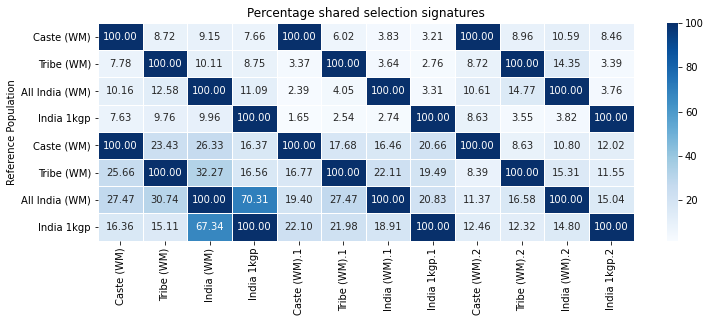

In [92]:
f, ax = plt.subplots(figsize=(12, 4))
sns.heatmap(Matriz_pop_1, annot=True, linewidths=.5,fmt='.2f', ax=ax, cmap="Blues")
ax.set_title("Percentage shared selection signatures")

plt.show() 
f.savefig('HeatmapSharedSignals_200kb.png')